# Boston Standardized Dataset -- KNN Regression

- Steps without HP Tuning
1. Data Gathering
2. EDA
3. Scaling -- Standardization
4. Model Building
5. Prediction
6. Evaluation

-- Test Data
 - MSE:  27.197070588235295
 - MAE:  3.4970588235294118
 - RMSE:  5.215081072067365
 - R2 Score:  0.7483569558534857
 
-- Train Data
 - MSE:  12.994429702970296
 - MAE:  2.2174257425742576
 - RMSE:  3.6047787314855118
 - R2 Score:  0.8341278594136134
 
###########################################################################################
- Steps with HP Tuning [K=3,P=2]
1. Data Gathering
2. EDA
3. Scaling -- Normalization
4. Hyperparameter Tuning
5. Model Building
6. Prediction
7. Evaluation

-- Test Data
 - MSE:  19.63635076252723
 - MAE:  3.06437908496732
 - RMSE:  4.431292222650999
 - R2 Score:  0.8183131133266767
 
-- Train Data
 - MSE:  7.789661716171618
 - MAE:  1.7781353135313531
 - RMSE:  2.790996545352863
 - R2 Score:  0.9005660199916381

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
import json

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

#### Data Gathering

In [2]:
dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['PRICE'] = dataset['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### EDA 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Scaling -- Normalization

In [5]:
x = df.drop('PRICE',axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y = df['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


##### Standardizing only train data

In [9]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000
mean,3.621175,11.295792,11.064530,0.074257,0.553977,6.265824,68.069554,3.837116,9.301980,403.586634,18.405941,359.34948,12.637847
std,9.062456,23.047039,6.782993,0.262514,0.117115,0.683905,28.486154,2.096137,8.558246,166.235415,2.127736,87.15085,7.009719
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.32000,1.920000
25%,0.082155,0.000000,5.190000,0.000000,0.449000,5.887750,42.750000,2.116550,4.000000,281.000000,17.225000,376.72250,6.907500
50%,0.248605,0.000000,9.125000,0.000000,0.538000,6.167000,76.700000,3.275900,5.000000,330.000000,18.800000,391.70500,11.490000
75%,3.023262,12.500000,18.100000,0.000000,0.624000,6.565500,94.100000,5.287300,8.000000,666.000000,20.200000,396.30750,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.90000,37.970000


In [10]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) 
arr = std_scalar.transform(x_train)

x_train_std = pd.DataFrame(arr,columns=x_train.columns)
x_train_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.362530,0.465026,-0.768242,-0.283221,-1.051356,-0.231056,-1.165853,2.014952,-0.269312,-0.443214,0.326601,0.354199,-0.496762
1,-0.394140,-0.490727,0.421497,-0.283221,-1.000060,0.414571,-0.599966,1.014207,-0.620285,-0.690158,-1.132154,0.384874,-0.749581
2,-0.145922,-0.490727,1.256971,-0.283221,0.436203,0.077850,0.985223,-0.829750,-0.503294,-0.003533,-1.743889,-0.715273,-0.219660
3,0.025248,-0.490727,1.038508,3.530817,1.846819,0.189114,0.805966,-0.636202,1.719540,1.580522,0.844223,0.367526,0.090294
4,-0.386099,0.595356,-0.875998,-0.283221,-0.863273,0.726404,-0.867093,1.979318,-0.152320,-0.720273,0.608940,0.416237,-0.448197


##### Standardizing test data

In [11]:
arr = std_scalar.transform(x_test)
x_test_std = pd.DataFrame(arr,columns=x_test.columns)
x_test_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.372027,-0.490727,-0.613252,-0.283221,-0.906019,-1.269035,0.957104,0.971027,-0.737277,-1.027447,-0.238078,0.431402,2.595637
1,-0.397920,0.269531,-1.429537,-0.283221,-1.178738,1.227094,-0.301205,2.572572,-0.737277,-1.129839,0.091318,0.389354,-0.655309
2,0.113323,-0.490727,1.038508,-0.283221,0.513146,1.045557,-0.016504,-0.622971,1.719540,1.580522,0.844223,0.176126,-0.139672
3,0.005800,-0.490727,1.038508,-0.283221,0.248121,0.067602,-0.568332,0.073839,1.719540,1.580522,0.844223,0.336277,-0.293934
4,-0.367131,-0.490727,-0.718055,-0.283221,-0.427265,2.079145,-1.795008,-0.220686,-0.152320,-0.581744,-0.473361,0.208639,-1.245222


#### Model Building 

In [12]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_std,y_train)

KNeighborsRegressor()

#### Prediction

In [13]:
#test data

y_test_pred = knn_reg.predict(x_test_std)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 15.319999999999999
28.7 22.82
23.7 20.3
13.1 9.48
25.0 20.08
11.9 20.660000000000004


In [14]:
#train data

y_train_pred = knn_reg.predict(x_train_std)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 13.9
14.1 13.879999999999999
44.8 44.7
21.2 21.04
21.4 23.560000000000002
22.0 21.42


#### Evaluation

In [15]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  27.197070588235295
MAE:  3.4970588235294118
RMSE:  5.215081072067365
R2 Score:  0.7483569558534857


In [16]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  12.994429702970296
MAE:  2.2174257425742576
RMSE:  3.6047787314855118
R2 Score:  0.8341278594136134


### With HP Tuning

[(1, 2, 0.14, 0.94, 0.8), (1, 3, 0.12, 0.91, 0.79), (1, 4, 0.09, 0.87, 0.78), (1, 5, 0.09, 0.84, 0.75), (1, 6, 0.09, 0.82, 0.73), (1, 7, 0.05, 0.81, 0.76), (1, 8, 0.03, 0.79, 0.76), (1, 9, 0.03, 0.77, 0.74), (1, 10, 0.02, 0.76, 0.74), (1, 11, 0.03, 0.76, 0.73), (1, 12, 0.02, 0.75, 0.73), (1, 13, 0.01, 0.74, 0.73), (1, 14, 0.0, 0.73, 0.73), (1, 15, 0.0, 0.72, 0.72), (1, 16, 0.01, 0.71, 0.72), (1, 17, 0.01, 0.71, 0.72), (1, 18, 0.02, 0.7, 0.72), (1, 19, 0.03, 0.69, 0.72), (1, 20, 0.03, 0.69, 0.72)]

[(2, 2, 0.12, 0.93, 0.81), (2, 3, 0.08, 0.9, 0.82), (2, 4, 0.08, 0.86, 0.78), (2, 5, 0.08, 0.83, 0.75), (2, 6, 0.08, 0.82, 0.74), (2, 7, 0.05, 0.8, 0.75), (2, 8, 0.04, 0.79, 0.75), (2, 9, 0.04, 0.78, 0.74), (2, 10, 0.02, 0.77, 0.75), (2, 11, 0.02, 0.77, 0.75), (2, 12, 0.01, 0.76, 0.75), (2, 13, 0.0, 0.75, 0.75), (2, 14, 0.0, 0.75, 0.75), (2, 15, 0.01, 0.74, 0.75), (2, 16, 0.01, 0.74, 0.75), (2, 17, 0.01, 0.74, 0.75), (2, 18, 0.01, 0.73, 0.74), (2, 19, 0.0, 0.73, 0.73), (2, 20, 0.0, 0.72, 0.72

Text(0.5, 1.0, 'Comparision of train test score')

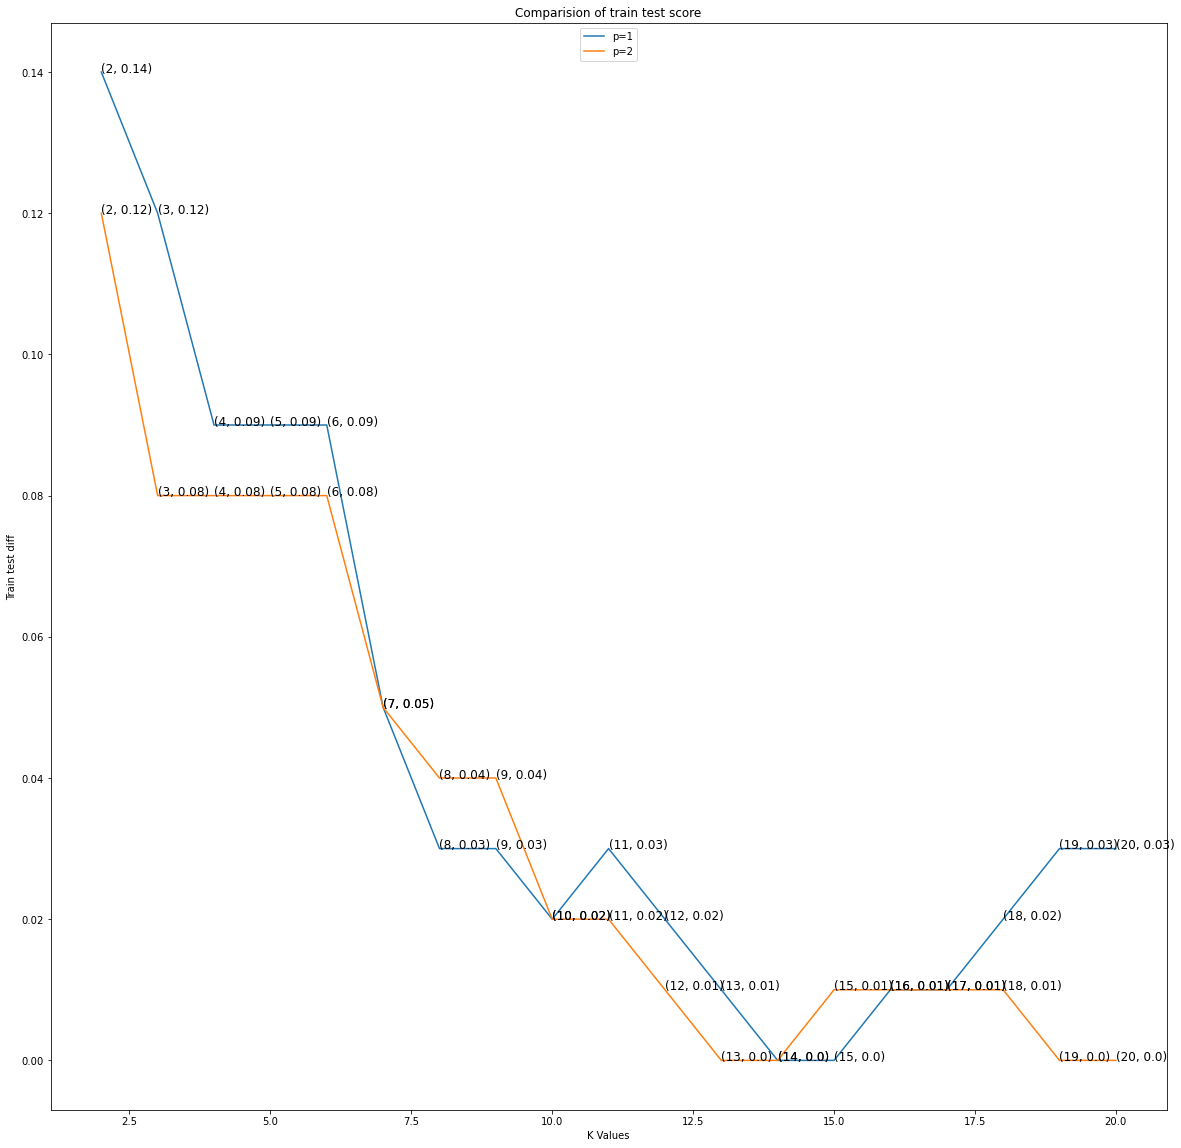

In [17]:
plt.figure(figsize=(20,20))

k_values = range(2,21)
p_values = [1,2]

for p_value in p_values:
    r2_train_list = []
    r2_test_list = []
    diff_list = []
    HP_data = []
    
    for k in k_values:
        knn_reg = KNeighborsRegressor(n_neighbors=k,p=p_value)
        knn_reg.fit(x_train_std,y_train)
        #train score
        r2_train = round(knn_reg.score(x_train_std,y_train),2)
        r2_train_list.append(r2_train)
        
        #test score
        r2_test = round(knn_reg.score(x_test_std,y_test),2)
        r2_test_list.append(r2_test)
        
        diff = round(abs(r2_train-r2_test),4)
        diff_list.append(diff)
        
        HP_data.append((p_value,k,diff,r2_train,r2_test))
        
    HP_data = sorted(HP_data,key=lambda x:x[3],reverse=True)
    print(HP_data,end="\n\n")
    
    plt.plot(k_values,diff_list,label=f"p={p_value}")
    for i in range(len(k_values)):
        plt.text(k_values[i],diff_list[i],(k_values[i],diff_list[i]),size=12)
        

leg = plt.legend(loc = 'upper center')
plt.xlabel('K Values')
plt.ylabel('Train test diff')
plt.title('Comparision of train test score')      

## K=3 and P=2
Train Score = 0.9
Test Score = 0.82

#### Model building 

In [19]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=2)
knn_reg.fit(x_train_std,y_train)

KNeighborsRegressor(n_neighbors=3)

#### Prediction

In [20]:
#test data

y_test_pred = knn_reg.predict(x_test_std)

print("Ya -- Yp")
for i in range(15,21):
    print(y_test.iloc[i],y_test_pred[i])

Ya -- Yp
18.6 13.833333333333334
28.7 22.733333333333334
23.7 19.733333333333334
13.1 9.9
25.0 20.9
11.9 21.666666666666668


In [21]:
#train data

y_train_pred = knn_reg.predict(x_train_std)

print("Ya -- Yp")
for i in range(15,21):
    print(y_train.iloc[i],y_train_pred[i])

Ya -- Yp
13.6 13.6
14.1 13.933333333333332
44.8 44.93333333333334
21.2 20.166666666666668
21.4 28.666666666666668
22.0 21.433333333333337


#### Evaluation

In [22]:
# Testing Data 

mse = mean_squared_error(y_test,y_test_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_test,y_test_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_test,y_test_pred)
print("R2 Score: ",score)

MSE:  19.63635076252723
MAE:  3.06437908496732
RMSE:  4.431292222650999
R2 Score:  0.8183131133266767


In [23]:
# Training data

mse = mean_squared_error(y_train,y_train_pred)
print("MSE: ",mse)
mae = mean_absolute_error(y_train,y_train_pred)
print("MAE: ",mae)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)
score = r2_score(y_train,y_train_pred)
print("R2 Score: ",score)

MSE:  7.789661716171618
MAE:  1.7781353135313531
RMSE:  2.790996545352863
R2 Score:  0.9005660199916381
